In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
sns.set()
import os
%matplotlib inline
os.chdir("/work/signate_practice/Debt_default_risk/data")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape, test.shape)
print(train.info())
print(test.info())

(242156, 10) (26906, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242156 entries, 0 to 242155
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 242156 non-null  int64  
 1   loan_amnt          242156 non-null  float64
 2   term               242156 non-null  object 
 3   interest_rate      242156 non-null  float64
 4   grade              242156 non-null  object 
 5   employment_length  228971 non-null  object 
 6   purpose            242156 non-null  object 
 7   credit_score       242156 non-null  float64
 8   application_type   242156 non-null  object 
 9   loan_status        242156 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 18.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26906 entries, 0 to 26905
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   

In [4]:
print(train.isnull().sum())
print("_"*40)
print(test.isnull().sum())

id                       0
loan_amnt                0
term                     0
interest_rate            0
grade                    0
employment_length    13185
purpose                  0
credit_score             0
application_type         0
loan_status              0
dtype: int64
________________________________________
id                      0
loan_amnt               0
term                    0
interest_rate           0
grade                   0
employment_length    1440
purpose                 0
credit_score            0
application_type        0
dtype: int64


In [5]:
train.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,88194295,1800.0,3 years,14.49,C4,NaN,debt_consolidation,665.0,Individual,FullyPaid
1,5146039,1200.0,5 years,16.29,C4,2 years,debt_consolidation,700.0,Individual,ChargedOff
2,3095896,2000.0,5 years,21.98,E4,10 years,home_improvement,670.0,Individual,FullyPaid
3,88625044,1000.0,3 years,8.59,A5,4 years,debt_consolidation,710.0,Individual,FullyPaid
4,1178189,1500.0,3 years,13.99,C1,4 years,debt_consolidation,680.0,Individual,FullyPaid


In [6]:
test.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,1496754,1912.5,3 years,10.16,B1,5 years,debt_consolidation,725.0,Individual
1,84909594,1800.0,3 years,8.99,B1,9 years,credit_card,695.0,Individual
2,1165403,550.0,3 years,14.65,C2,10 years,credit_card,660.0,Individual
3,91354446,2000.0,5 years,15.59,C5,10 years,credit_card,695.0,Individual
4,85636932,1500.0,5 years,12.79,C1,0 years,medical,720.0,Individual


In [7]:
train["loan_status"].value_counts()

FullyPaid     193815
ChargedOff     48341
Name: loan_status, dtype: int64

In [8]:
train = train.drop("id", axis=1)
test = test.drop("id", axis=1)

In [9]:
train = train.dropna()

In [10]:
train.describe()

,loan_amnt,interest_rate,credit_score
count,228971.000000,228971.000000,228971.000000
mean,1433.415476,13.992611,697.338484
std,875.149218,4.846862,31.715229
min,100.000000,5.320000,660.000000
25%,780.000000,10.640000,675.000000
50%,1200.000000,13.490000,690.000000
75%,2000.000000,16.990000,715.000000
max,4000.000000,30.990000,845.000000


In [11]:
train.describe(include=["O"])

,term,grade,employment_length,purpose,application_type,loan_status
count,228971,228971,228971,228971,228971,228971
unique,2,35,11,13,2,2
top,3 years,B3,10 years,debt_consolidation,Individual,FullyPaid
freq,177580,16060,79095,133880,223790,184426


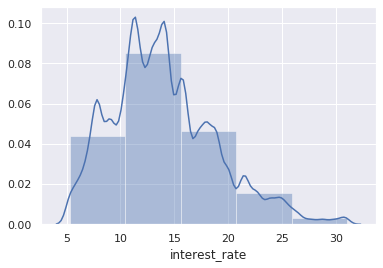

In [12]:
sns.distplot(train["interest_rate"], bins=5)

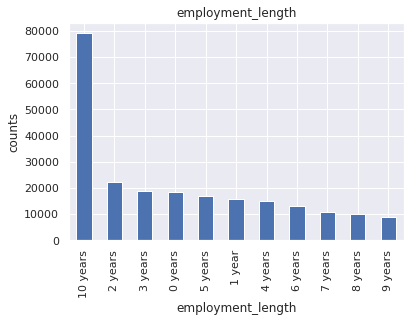

In [13]:
counts = train["employment_length"].value_counts()
counts.plot.bar(title="employment_length")
plt.xlabel("employment_length")
plt.ylabel("counts")
plt.show()

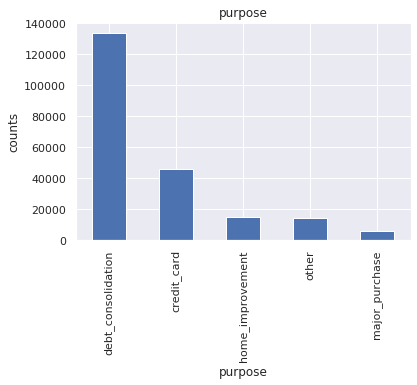

In [14]:
counts = train["purpose"].value_counts().head(5)
counts.plot.bar(title="purpose")
plt.xlabel("purpose")
plt.ylabel("counts")
plt.show()

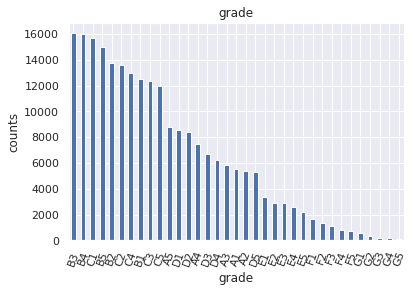

In [15]:
counts = train["grade"].value_counts()
counts.plot.bar(title="grade")
plt.xlabel("grade")
plt.ylabel("counts")
plt.xticks(rotation=70)
plt.show()

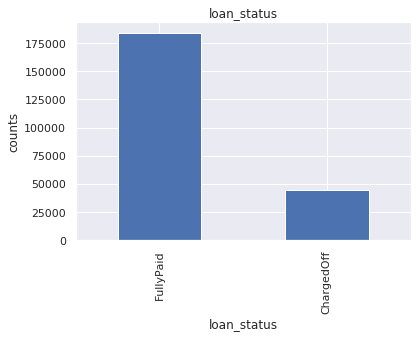

In [16]:
counts = train["loan_status"].value_counts()
counts.plot.bar(title="loan_status")
plt.xlabel("loan_status")
plt.ylabel("counts")
plt.show()

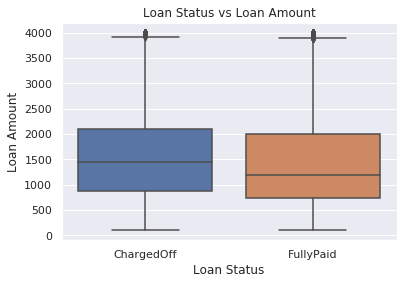

In [17]:
sns.boxplot(data=train, x='loan_status', y='loan_amnt')
plt.title("Loan Status vs Loan Amount")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

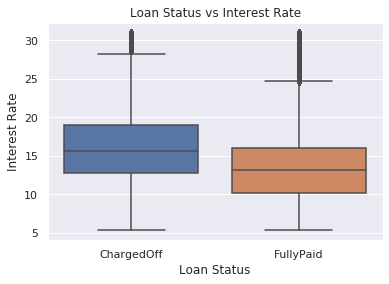

In [18]:
sns.boxplot(data=train, x="loan_status", y="interest_rate")
plt.title("Loan Status vs Interest Rate")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

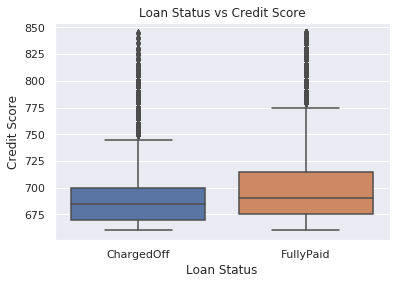

In [19]:
sns.boxplot(data=train, x="loan_status", y="credit_score")
plt.title("Loan Status vs Credit Score")
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.show()

In [20]:
cross_tab = pd.crosstab(train["term"], train["loan_status"], margins=True)
display(cross_tab)

loan_status,ChargedOff,FullyPaid,All
term,,,
3 years,29339,148241,177580
5 years,15206,36185,51391
All,44545,184426,228971


In [21]:
c_rate = cross_tab["ChargedOff"] / cross_tab["All"]
f_rate = cross_tab["FullyPaid"] / cross_tab["All"]

cross_tab["c_rate"] = c_rate
cross_tab["f_rate"] = f_rate

display(cross_tab)

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
term,,,,,
3 years,29339,148241,177580,0.165216,0.834784
5 years,15206,36185,51391,0.295888,0.704112
All,44545,184426,228971,0.194544,0.805456


In [22]:
cross_tab = cross_tab.drop(index=["All"])
cross_tab

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
term,,,,,
3 years,29339,148241,177580,0.165216,0.834784
5 years,15206,36185,51391,0.295888,0.704112


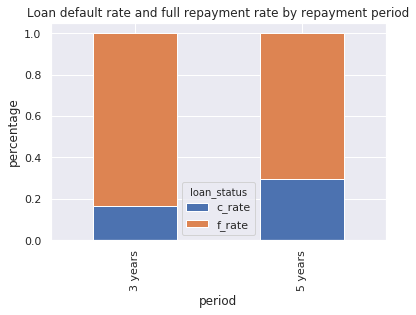

In [23]:
tmp = cross_tab[["c_rate", "f_rate"]]
tmp.plot.bar(stacked=True)
plt.title("Loan default rate and full repayment rate by repayment period")
plt.xlabel("period")
plt.ylabel("percentage")
plt.show()

In [24]:
cross_en = pd.crosstab(train['employment_length'], train['loan_status'], margins = True)

c_rate = cross_en["ChargedOff"] / cross_en["All"]

f_rate = cross_en["FullyPaid"] / cross_en["All"]

cross_en['c_rate'] = c_rate
cross_en["f_rate"] = f_rate

cross_en = cross_en.drop(index=["All"])
cross_en

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
employment_length,,,,,
0 years,3899,14612,18511,0.210632,0.789368
1 year,3219,12664,15883,0.202670,0.797330
10 years,15013,64082,79095,0.189810,0.810190
2 years,4318,17780,22098,0.195402,0.804598
3 years,3805,14967,18772,0.202696,0.797304
4 years,2933,11962,14895,0.196912,0.803088
5 years,3271,13724,16995,0.192468,0.807532
6 years,2461,10666,13127,0.187476,0.812524
7 years,1998,8680,10678,0.187114,0.812886


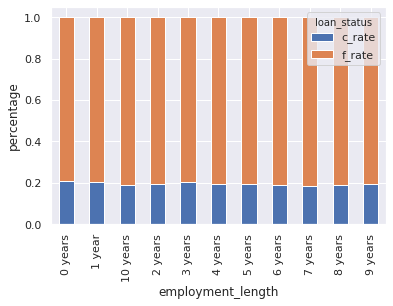

In [25]:
tmp = cross_en[["c_rate", "f_rate"]]
tmp.plot.bar(stacked=True)
plt.xlabel("employment_length")
plt.ylabel("percentage")
plt.show()

In [26]:
cross_grade = pd.crosstab(train["grade"], train["loan_status"], margins=True)
c_rate = cross_grade["ChargedOff"] / cross_grade["All"]
f_rate = cross_grade["FullyPaid"] / cross_grade["All"]

cross_grade["c_rate"] = c_rate
cross_grade["f_rate"] = f_rate

cross_grade = cross_grade.drop(index=["All"])
display(cross_grade)

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
grade,,,,,
A1,194,5316,5510,0.035209,0.964791
A2,244,5128,5372,0.045421,0.954579
A3,337,5486,5823,0.057874,0.942126
A4,539,6916,7455,0.072300,0.927700
A5,744,8054,8798,0.084565,0.915435
B1,1320,11180,12500,0.105600,0.894400
B2,1483,12244,13727,0.108035,0.891965
B3,1966,14094,16060,0.122416,0.877584
B4,2319,13709,16028,0.144684,0.855316


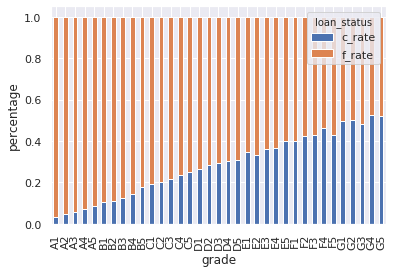

In [27]:
tmp = cross_grade[["c_rate", "f_rate"]]
tmp.plot.bar(stacked=True)
plt.xlabel("grade")
plt.ylabel("percentage")
plt.show()

In [28]:
cross_purpose = pd.crosstab(train["purpose"], train["loan_status"], margins=True)
c_rate = cross_purpose["ChargedOff"] / cross_purpose["All"]
f_rate = cross_purpose["FullyPaid"] / cross_purpose["All"]

cross_purpose["c_rate"] = c_rate
cross_purpose["f_rate"] = f_rate
c_rate = cross_purpose["ChargedOff"] / cross_purpose["All"]
f_rate = cross_purpose["FullyPaid"] / cross_purpose["All"]

cross_purpose["c_rate"] = c_rate
cross_purpose["f_rate"] = f_rate
cross_purpose = cross_purpose.drop(index=["All"])
display(cross_purpose)

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
purpose,,,,,
car,387,2338,2725,0.142018,0.857982
credit_card,7469,38214,45683,0.163496,0.836504
debt_consolidation,27339,106541,133880,0.204205,0.795795
home_improvement,2604,12439,15043,0.173104,0.826896
house,333,1290,1623,0.205176,0.794824
major_purchase,1003,4423,5426,0.184851,0.815149
medical,531,2046,2577,0.206054,0.793946
moving,358,1325,1683,0.212715,0.787285
other,3077,11250,14327,0.214769,0.785231


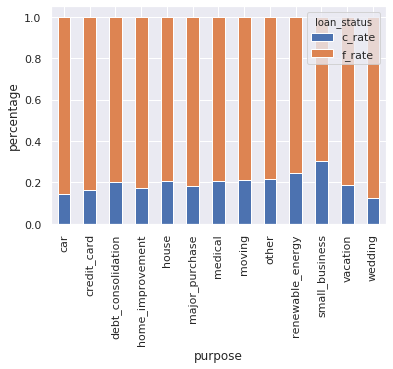

In [29]:
tmp = cross_purpose[["c_rate", "f_rate"]]
tmp.plot.bar(stacked=True)
plt.xlabel("purpose")
plt.ylabel("percentage")
plt.show()

In [30]:
cross_at = pd.crosstab(train["application_type"], train["loan_status"], margins=True)

c_rate = cross_at["ChargedOff"] / cross_at["All"]
f_rate = cross_at["FullyPaid"] / cross_at["All"]

cross_at["c_rate"] = c_rate
cross_at["f_rate"] = f_rate
c_rate = cross_at["ChargedOff"] / cross_at["All"]
f_rate = cross_at["FullyPaid"] / cross_at["All"]

cross_at["c_rate"] = c_rate
cross_at["f_rate"] = f_rate
cross_at = cross_at.drop(index=["All"])
display(cross_at)

loan_status,ChargedOff,FullyPaid,All,c_rate,f_rate
application_type,,,,,
Individual,43223,180567,223790,0.193141,0.806859
Joint App,1322,3859,5181,0.255163,0.744837


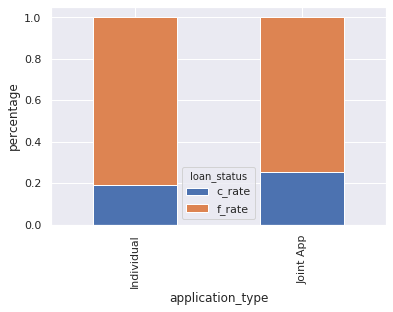

In [31]:
tmp = cross_at[["c_rate", "f_rate"]]
tmp.plot.bar(stacked=True)
plt.xlabel("application_type")
plt.ylabel("percentage")
plt.show()

In [32]:
train.columns

Index(['loan_amnt', 'term', 'interest_rate', 'grade', 'employment_length',
       'purpose', 'credit_score', 'application_type', 'loan_status'],
      dtype='object')

In [33]:
X = train[["interest_rate", "loan_amnt", "credit_score", "term", "purpose", "application_type", "grade"]]
target = train["loan_status"]

In [35]:
X_dum = pd.get_dummies(X)
target_dum = pd.get_dummies(target)

In [38]:
target_dum = target_dum.drop(["FullyPaid"], axis=1)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, target_dum, random_state=0, stratify=target_dum["ChargedOff"])

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171728, 55) (57243, 55) (171728, 1) (57243, 1)


In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
f_one = f1_score(y_test, y_pred)
print(f_one)

0.04574549799436716


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45794,   245],
       [10936,   268]])

In [50]:
pred_proba = lr.predict_proba(X_test)
proba_df = pd.DataFrame(pred_proba)
proba_df.head()

,0,1
0,0.740195,0.259805
1,0.761309,0.238691
2,0.854457,0.145543
3,0.903357,0.096643
4,0.757428,0.242572


In [51]:
chargedoff_val = y_test['ChargedOff'].sum()
print(chargedoff_val)

proba_desc = proba_df[1].sort_values(ascending = False)

threshold = proba_desc.iloc[chargedoff_val]
print(threshold)

11204
0.2699261653708517


In [52]:
def classification(x):
    if x >= threshold:
        return 1
    else:
        return 0

In [56]:
proba_df["class_new"] = proba_df[1].apply(classification)
proba_df.head()

,0,1,class_new
0,0.740195,0.259805,0
1,0.761309,0.238691,0
2,0.854457,0.145543,0
3,0.903357,0.096643,0
4,0.757428,0.242572,0


In [57]:
proba_df["class_new"].value_counts()

0    46038
1    11205
Name: class_new, dtype: int64

In [58]:
f1_one = f1_score(y_test, proba_df["class_new"])
print(f1_one)

0.3402204471417734


In [61]:
cm2 = confusion_matrix(y_test, proba_df["class_new"])
print(cm)
print(cm2)

[[45794   245]
 [10936   268]]
[[38646  7393]
 [ 7392  3812]]


In [62]:
tmp = pd.concat([X_train, y_train], axis=1)
fp = tmp[tmp["ChargedOff"] == 0]
co = tmp[tmp["ChargedOff"] == 1]

print(co.shape[0])
fp = fp.sample(n=co.shape[0], random_state=0)
print(fp.shape[0])

33341
33341


In [63]:
tmp = pd.concat([fp, co])
X_train = tmp.drop(["ChargedOff"], axis=1)
y_train = tmp["ChargedOff"]


In [64]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_3 = f1_score(y_test, y_pred)
f1_3

0.3878420986252995

In [66]:
cm3 = confusion_matrix(y_test, y_pred)
print(cm)
print(cm2)
print(cm3)

[[45794   245]
 [10936   268]]
[[38646  7393]
 [ 7392  3812]]
[[25286 20753]
 [ 3516  7688]]


In [69]:
tmp = test[["loan_amnt", "term", "interest_rate", "grade", "purpose", "credit_score", "application_type"]]
tmp_1 = test["employment_length"]
tmp_dummy = pd.get_dummies(tmp)

In [76]:
test = tmp_dummy

In [77]:
test.head()

,loan_amnt,interest_rate,credit_score,term_3 years,term_5 years,grade_A1,grade_A2,grade_A3,grade_A4,grade_A5,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Individual,application_type_Joint App
0,1912.5,10.16,725.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1800.0,8.99,695.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,550.0,14.65,660.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2000.0,15.59,695.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1500.0,12.79,720.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [78]:
pred = lr.predict(test)

In [85]:
submission = pd.read_csv("submit.csv", header=None)
submission.head()

,0,1
0,1496754,0
1,84909594,0
2,1165403,0
3,91354446,0
4,85636932,0


In [86]:
submission[1] = pred
submission.head()

,0,1
0,1496754,1
1,84909594,1
2,1165403,1
3,91354446,1
4,85636932,1


In [87]:
submission.to_csv("submission.csv", index=False)